<a href="https://colab.research.google.com/github/shailavij/ML-Projects/blob/master/Outlier_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install indsl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 633.1/633.1 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 KB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from indsl.data_quality import extreme

In [ ]:

rng = np.random.default_rng(12345)
plt.rcParams.update({"font.size": 18})
# Create Toy clean dataset
nx = 1000
index = pd.date_range(start="1970", periods=nx, freq="1T")
x = np.linspace(0, 10, nx)
signal = 2 * x**2 - 10 * x + 2
noise = np.random.normal(loc=100, size=nx, scale=2)
y = noise + signal
y

In [ ]:
# Add anomalies
anom_num = rng.integers(low=0, high=200, size=20)
anom_ids = rng.integers(low=0, high=nx, size=20)
y[anom_ids] = anom_num
is_anom = [item in anom_ids for item in range(nx)]
raw_data = pd.Series(y, index=index)
raw_data

1970-01-01 00:00:00    102.499084
1970-01-01 00:01:00     98.350362
1970-01-01 00:02:00    100.346249
1970-01-01 00:03:00    100.107609
1970-01-01 00:04:00    100.922389
                          ...    
1970-01-01 16:35:00    202.725596
1970-01-01 16:36:00    198.719315
1970-01-01 16:37:00    200.552135
1970-01-01 16:38:00    197.957281
1970-01-01 16:39:00    201.898749
Freq: T, Length: 1000, dtype: float64

In [ ]:
# Find anomalies and plot results
res = extreme(raw_data)
res

1970-01-01 00:00:00    102.499084
1970-01-01 00:01:00     98.350362
1970-01-01 00:02:00    100.346249
1970-01-01 00:03:00    100.107609
1970-01-01 00:04:00    100.922389
                          ...    
1970-01-01 16:35:00    202.725596
1970-01-01 16:36:00    198.719315
1970-01-01 16:37:00    200.552135
1970-01-01 16:38:00    197.957281
1970-01-01 16:39:00    201.898749
Length: 963, dtype: float64

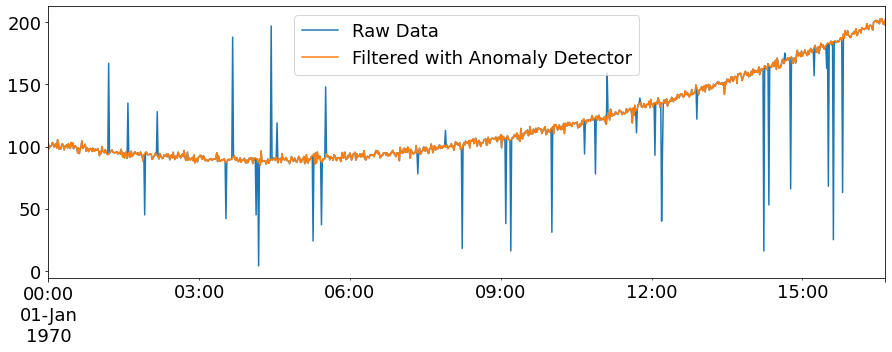

In [ ]:
plt.figure(1, figsize=[15, 5])
raw_data.plot()
res.plot()

_ = plt.legend(["Raw Data", "Filtered with Anomaly Detector"])

In [ ]:
from indsl.oil_and_gas.well_prod_status import calculate_well_prod_status
css= calculate_well_prod_status()